In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


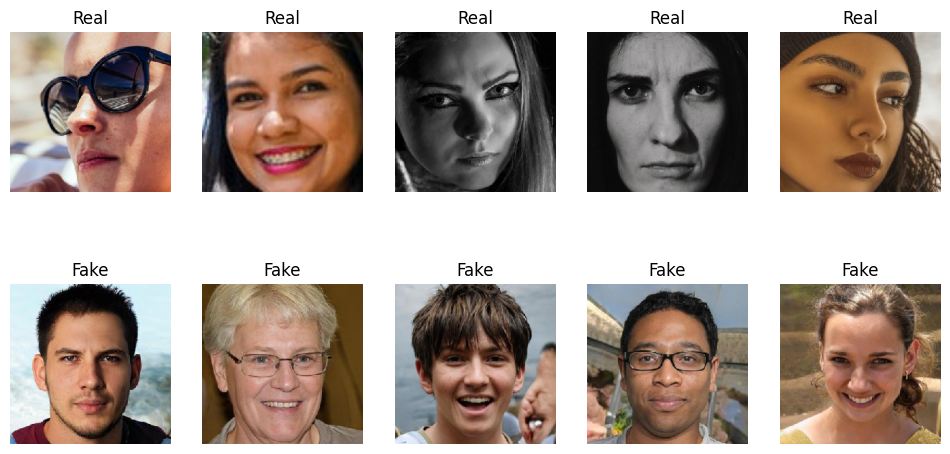

In [2]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import load_img, img_to_array

# Set dataset paths
dataset_path = "/content/drive/MyDrive/dataset_hackathon"
real_images_path = os.path.join(dataset_path, "real")
fake_images_path = os.path.join(dataset_path, "fake")

# Function to display sample images
def show_sample_images():
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))

    # Load and display real images
    real_images = os.listdir(real_images_path)[:5]
    for i, img_name in enumerate(real_images):
        img_path = os.path.join(real_images_path, img_name)
        img = load_img(img_path, target_size=(224, 224))
        axes[0, i].imshow(img)
        axes[0, i].set_title("Real")
        axes[0, i].axis("off")

    # Load and display fake images
    fake_images = os.listdir(fake_images_path)[:5]
    for i, img_name in enumerate(fake_images):
        img_path = os.path.join(fake_images_path, img_name)
        img = load_img(img_path, target_size=(224, 224))
        axes[1, i].imshow(img)
        axes[1, i].set_title("Fake")
        axes[1, i].axis("off")

    plt.show()

# Show dataset samples
show_sample_images()


In [3]:
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator

# Define image parameters
img_size = (224, 224)
batch_size = 32

# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    validation_split=0.2
)

# Load Training Data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="training"
)

# Load Validation Data
val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="validation"
)


Found 1032 images belonging to 2 classes.
Found 257 images belonging to 2 classes.


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary Classification (Real vs. Fake)
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Save the trained model
model.save("realvsfake_cnn_model.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 230s 7s/step - accuracy: 0.6434 - loss: 0.6956 - val_accuracy: 0.9961 - val_loss: 0.0215
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 189s 5s/step - accuracy: 0.9856 - loss: 0.0481 - val_accuracy: 0.9961 - val_loss: 0.0160
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 158s 5s/step - accuracy: 0.9899 - loss: 0.0451 - val_accuracy: 0.9922 - val_loss: 0.0128
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - accuracy: 0.9924 - loss: 0.0212 - val_accuracy: 0.9961 - val_loss: 0.0100
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 154s 5s/step - accuracy: 0.9974 - loss: 0.0139 - val_accuracy: 0.9961 - val_loss: 0.0050
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.9964 - loss: 0.0104 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.9966 - loss: 0.0049 - val_accuracy: 0.9961 - val_loss: 0.0082
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.9976 - loss: 0.0095 - val_accuracy: 1.0000 - v

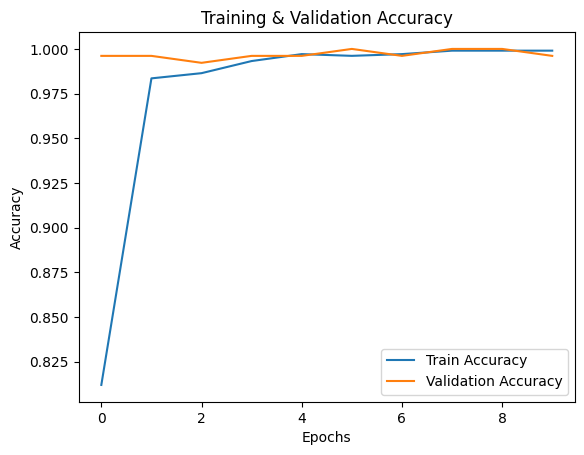

In [5]:
# Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")
plt.show()


In [6]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [7]:
import gradio as gr
from tensorflow.keras.models import load_model
from PIL import Image


model = load_model("realvsfake_cnn_model.h5")

# preprocess input images
def preprocess_image(img):
    img = img.resize((224, 224))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Prediction
def predict_image(img):
    processed_img = preprocess_image(img)
    prediction = model.predict(processed_img)[0][0]
    confidence = float(prediction)
    label = "Real" if confidence > 0.5 else "Fake"
    return label, confidence

# Gradio Interface
iface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=[gr.Label(), gr.Number()],
    title="Real vs. Fake Image Detector",
    description="Upload an image to check if it's real or fake."
)

# Launch the app
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3ab3997d2e152c28b5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#Black Box Attack using Foolbox

### FGSM (Fast Gradient Sign Method) Transfer Attack

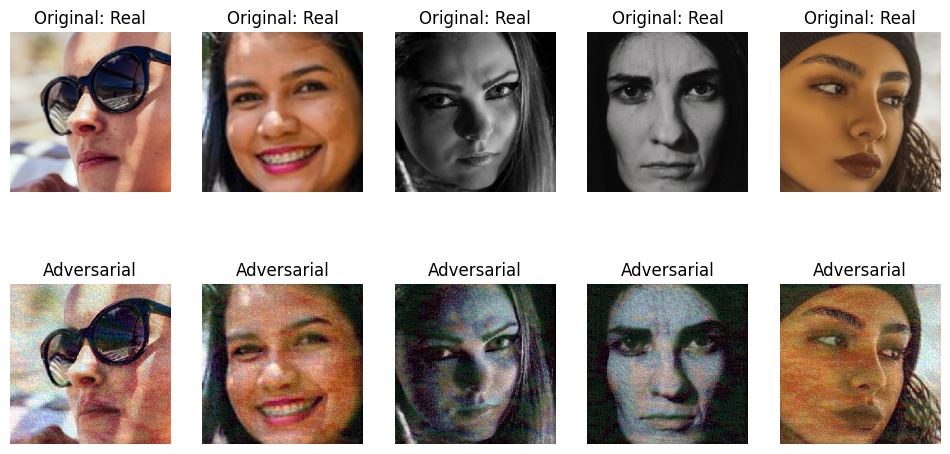

In [10]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import load_img, img_to_array
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator

# Dataset path
dataset_path = "/content/drive/MyDrive/dataset_hackathon"
real_test_path = os.path.join(dataset_path, "real")
fake_test_path = os.path.join(dataset_path, "fake")

# Model
model = tf.keras.models.load_model("realvsfake_cnn_model.h5")

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Test dataset
def load_test_images():
    test_images = []
    test_labels = []

    for img_name in os.listdir(real_test_path)[:10]:  # das real images
        img = load_img(os.path.join(real_test_path, img_name), target_size=(224, 224))
        img = img_to_array(img) / 255.0
        test_images.append(img)
        test_labels.append(1)  # Real images ko 1 indicate

    for img_name in os.listdir(fake_test_path)[:10]:  # das fake images
        img = load_img(os.path.join(fake_test_path, img_name), target_size=(224, 224))
        img = img_to_array(img) / 255.0
        test_images.append(img)
        test_labels.append(0)  # Fake images ko 0 indicate

    test_images = np.array(test_images)
    test_labels = np.array(test_labels)

    # Reshape labels to match model output shape
    test_labels = np.expand_dims(test_labels, axis=-1)

    return test_images, test_labels

test_images, test_labels = load_test_images()


# FGSM Attack Function

def fgsm_attack(image, epsilon, gradient):
    perturbation = epsilon * np.sign(gradient)  # adversarial noise
    adversarial_image = image + perturbation
    adversarial_image = np.clip(adversarial_image, 0, 1)
    return adversarial_image


# Generate Adversarial Samples
def generate_adversarial_samples(model, images, labels, epsilon=0.01): # epsilon ki value affect karegi image ko
    images = tf.convert_to_tensor(images, dtype=tf.float32)
    labels = tf.convert_to_tensor(labels, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(images)
        predictions = model(images)
        labels = tf.reshape(labels, (labels.shape[0], 1))
        loss = tf.keras.losses.binary_crossentropy(labels, predictions)

    gradients = tape.gradient(loss, images)
    adversarial_examples = fgsm_attack(images.numpy(), epsilon, gradients.numpy())
    return adversarial_examples

# Generate adversarial examples
epsilon = 0.1  # epsilon ki value affect karegi image ko (Strength of attack)
adversarial_samples = generate_adversarial_samples(model, test_images, test_labels, epsilon)

# Visualize Results
def plot_images(original, adversarial, labels, num_samples=5):
    fig, axes = plt.subplots(2, num_samples, figsize=(12, 6))

    for i in range(num_samples):
        # Original Image
        axes[0, i].imshow(original[i])
        axes[0, i].set_title(f"Original: {'Real' if labels[i] == 1 else 'Fake'}")
        axes[0, i].axis("off")

        # Adversarial Image
        axes[1, i].imshow(adversarial[i])
        axes[1, i].set_title("Adversarial")
        axes[1, i].axis("off")

    plt.show()

# Plot results
plot_images(test_images, adversarial_samples, test_labels, num_samples=5)


In [11]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import load_img, img_to_array
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import shutil

dataset_path = "/content/drive/MyDrive/dataset_hackathon"
real_test_path = os.path.join(dataset_path, "real")
fake_test_path = os.path.join(dataset_path, "fake")

#save adversarial images
output_folder = "/content/adversarial_images"
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)
os.makedirs(output_folder)

# Load Trained Model
model = tf.keras.models.load_model("realvsfake_cnn_model.h5")
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Test Data
def load_test_images():
    test_images = []
    test_labels = []
    image_names = []

    for img_name in os.listdir(real_test_path)[:10]:
        img = load_img(os.path.join(real_test_path, img_name), target_size=(224, 224))
        img = img_to_array(img) / 255.0
        test_images.append(img)
        test_labels.append(1)
        image_names.append(img_name)

    for img_name in os.listdir(fake_test_path)[:10]:
        img = load_img(os.path.join(fake_test_path, img_name), target_size=(224, 224))
        img = img_to_array(img) / 255.0
        test_images.append(img)
        test_labels.append(0)
        image_names.append(img_name)

    test_images = np.array(test_images)
    test_labels = np.array(test_labels)
    test_labels = np.expand_dims(test_labels, axis=-1)

    return test_images, test_labels, image_names

test_images, test_labels, image_names = load_test_images()

# FGSM Attack Function
def fgsm_attack(image, epsilon, gradient):
    perturbation = epsilon * np.sign(gradient)
    adversarial_image = image + perturbation
    adversarial_image = np.clip(adversarial_image, 0, 1)
    return adversarial_image

# Generate Adversarial Samples
def generate_adversarial_samples(model, images, labels, epsilon=0.02):
    images = tf.convert_to_tensor(images, dtype=tf.float32)
    labels = tf.convert_to_tensor(labels, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(images)
        predictions = model(images)
        labels = tf.reshape(labels, (labels.shape[0], 1))  # Fix shape issue
        loss = tf.keras.losses.binary_crossentropy(labels, predictions)

    gradients = tape.gradient(loss, images)
    adversarial_examples = fgsm_attack(images.numpy(), epsilon, gradients.numpy())
    return adversarial_examples

# Generate adversarial examples
epsilon = 0.1  # Strength of attack
adversarial_samples = generate_adversarial_samples(model, test_images, test_labels, epsilon)


# Save Fooled Images
misclassified_count = 0  # Count number of fooled images

for i in range(len(adversarial_samples)):
    orig_label = test_labels[i][0]  # True label (1 = Real, 0 = Fake)

    # Get new prediction after attack
    pred = model.predict(np.expand_dims(adversarial_samples[i], axis=0))[0][0]
    new_label = 1 if pred > 0.5 else 0  # Convert prediction to class label

    # Check if the model was fooled
    if new_label != orig_label:
        misclassified_count += 1
        img = (adversarial_samples[i] * 255).astype(np.uint8)
        img_pil = Image.fromarray(img)

        # Save adversarial image
        save_path = os.path.join(output_folder, f"fooled_{image_names[i]}")
        img_pil.save(save_path)

print(f" {misclassified_count} images successfully fooled the model!")

# Zip Image to Download
zip_path = "/content/adversarial_images.zip"
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', output_folder)
print(f" Adversarial images saved! Download here: {zip_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
 14 images successfully fooled the model!
 Adversarial images saved! Download here: /content/adversarial_images.zip


# Defense

## photo response non-uniformity (PRNU)

In [12]:
import os
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import load_img, img_to_array
from scipy.fftpack import fft2, ifft2
# dataset path
dataset_path = "/content/drive/MyDrive/dataset_hackathon"
real_images_path = os.path.join(dataset_path, "real")
fake_images_path = os.path.join(dataset_path, "fake")

# Load trained CNN model
model = tf.keras.models.load_model("realvsfake_cnn_model.h5")

# Function to extract PRNU noise pattern
def extract_prnu(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img) / 255.0  # Normalize image
    gray = cv2.cvtColor(img.astype('float32'), cv2.COLOR_RGB2GRAY)  # Convert to grayscale

    # Apply Gaussian blur to remove structures and keep noise
    noise = gray - cv2.GaussianBlur(gray, (5,5), 0)

    # FFT for frequency domain PRNU estimation
    noise_fft = fft2(noise)
    prnu_pattern = np.abs(ifft2(noise_fft))

    return prnu_pattern

# Compute PRNU signatures for real and fake images
def compute_prnu_signature(image_folder):
    prnu_signatures = []

    for img_name in os.listdir(image_folder)[:10]:  # Use 10 images for signature calculation
        img_path = os.path.join(image_folder, img_name)
        prnu = extract_prnu(img_path)
        prnu_signatures.append(prnu)

    return np.mean(prnu_signatures, axis=0)  # Average PRNU signature

# Generate PRNU signatures for real and fake images
print("Computing PRNU signatures...")
real_prnu = compute_prnu_signature(real_images_path)
fake_prnu = compute_prnu_signature(fake_images_path)
print("PRNU signatures computed.")

# Function to compare PRNU of a test image
def compare_prnu(test_image_path, real_prnu, fake_prnu):
    test_prnu = extract_prnu(test_image_path)

    real_similarity = np.corrcoef(test_prnu.flatten(), real_prnu.flatten())[0, 1]
    fake_similarity = np.corrcoef(test_prnu.flatten(), fake_prnu.flatten())[0, 1]

    return real_similarity, fake_similarity

# Function to make predictions using CNN + PRNU
def predict_with_prnu(model, image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    # CNN Model prediction
    pred_prob = model.predict(img)[0][0]

    # PRNU similarity check
    real_sim, fake_sim = compare_prnu(image_path, real_prnu, fake_prnu)

    # Decision Logic: Use CNN + PRNU Similarity
    if real_sim > fake_sim and pred_prob > 0.5:
        return "Real"
    elif fake_sim > real_sim and pred_prob < 0.5:
        return "Fake"
    else:
        return "Uncertain (Possible Attack)"

# Function to test the defense on adversarial images
def test_prnu_defense(test_images_folder):
    correct, total = 0, 0

    for img_name in os.listdir(test_images_folder)[:10]:  # Test on 10 images
        img_path = os.path.join(test_images_folder, img_name)
        label = "Real" if "real" in img_name.lower() else "Fake"
        pred = predict_with_prnu(model, img_path)

        print(f"Image: {img_name} | Predicted: {pred} | Actual: {label}")

        if pred == label:
            correct += 1
        total += 1

    print(f"PRNU Defense Accuracy: {correct}/{total} ({(correct/total)*100:.2f}%)")

# Test PRNU defense on real and fake images
test_prnu_defense(real_images_path)
test_prnu_defense(fake_images_path)

Computing PRNU signatures...
PRNU signatures computed.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Image: real_113.jpg | Predicted: Real | Actual: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Image: real_111.jpg | Predicted: Real | Actual: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Image: real_118.jpg | Predicted: Real | Actual: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Image: real_117.jpg | Predicted: Real | Actual: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Image: real_102.jpg | Predicted: Real | Actual: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Image: real_100.jpg | Predicted: Real | Actual: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Image: real_1.jpg | Predicted: Real | Actual: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Image: real_110.jpg | Predicted: Real | Actual: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Image: real_116.jpg | Predicted: Real | Actual: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Image: real_108.jpg | Predicted: Real | Actual: Real
PRNU Defense Accuracy: 10/10 (100.00

## Adversarial_images

In [13]:
adversarial_images_folder = "/content/adversarial_images"

print("Testing PRNU Defense Against FGSM Attack...")
test_prnu_defense(adversarial_images_folder)

Testing PRNU Defense Against FGSM Attack...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Image: fooled_real_1.jpg | Predicted: Uncertain (Possible Attack) | Actual: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Image: fooled_real_102.jpg | Predicted: Uncertain (Possible Attack) | Actual: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Image: fooled_real_110.jpg | Predicted: Uncertain (Possible Attack) | Actual: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Image: fooled_real_113.jpg | Predicted: Uncertain (Possible Attack) | Actual: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Image: fooled_fake_120.jpg | Predicted: Real | Actual: Fake
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Image: fooled_fake_116.jpg | Predicted: Uncertain (Possible Attack) | Actual: Fake
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Image: fooled_real_108.jpg | Predicted: Uncertain (Possible Attack) | Actual: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Image: fooled_fake_111.jpg | Predicted: Uncertain (Possible Attack) | Actual: Fake
1/1 ━━

In [16]:
!pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 53.7 MB/s eta 0:00:00


## improving prnu defense

In [18]:
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.restoration import denoise_wavelet
from scipy.stats import pearsonr
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import load_img, img_to_array

# Ensure PyWavelets is installed
!pip install PyWavelets

# Paths
dataset_path = "/content/drive/MyDrive/dataset_hackathon"
adversarial_images_folder = "/content/adversarial_images"

# Load pre-trained model
model = tf.keras.models.load_model("realvsfake_cnn_model.h5")
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# PRNU Extraction Function
def extract_prnu(image):
    """ Extracts PRNU noise pattern from an image using wavelet denoising. """
    image = image.astype(np.float32) / 255.0
    denoised = denoise_wavelet(image, wavelet='haar', mode='soft', channel_axis=-1)  # Fix multichannel issue
    prnu_noise = image - denoised
    return prnu_noise

# Compute PRNU Signatures for Clean Dataset
def compute_prnu_signatures(image_folder):
    """ Computes PRNU signatures for a given image folder. """
    prnu_signatures = {}
    for img_name in os.listdir(image_folder):
        img_path = os.path.join(image_folder, img_name)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img)
        prnu_signatures[img_name] = extract_prnu(img_array)
    return prnu_signatures

# Compute PRNU for original real and fake datasets
real_test_path = os.path.join(dataset_path, "real")
fake_test_path = os.path.join(dataset_path, "fake")

print("Computing PRNU signatures for real images...")
real_prnu_signatures = compute_prnu_signatures(real_test_path)
print("Computing PRNU signatures for fake images...")
fake_prnu_signatures = compute_prnu_signatures(fake_test_path)

# Improved PRNU-Based Defense
def test_prnu_defense(adversarial_folder, real_prnu_signatures, fake_prnu_signatures):
    """ Tests PRNU-based defense against adversarial images. """
    correct_predictions = 0
    total_images = 0

    for img_name in os.listdir(adversarial_folder):
        img_path = os.path.join(adversarial_folder, img_name)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img)

        # Extract PRNU noise from adversarial image
        adv_prnu = extract_prnu(img_array)

        # Correlate with real and fake PRNU
        best_real_corr = max([pearsonr(adv_prnu.flatten(), ref.flatten())[0] for ref in real_prnu_signatures.values()])
        best_fake_corr = max([pearsonr(adv_prnu.flatten(), ref.flatten())[0] for ref in fake_prnu_signatures.values()])

        # Threshold-based classification
        threshold = 0.1  # Experiment with different thresholds
        if best_real_corr > threshold and best_fake_corr < threshold:
            predicted_label = "Real"
        elif best_fake_corr > threshold and best_real_corr < threshold:
            predicted_label = "Fake"
        else:
            predicted_label = "Uncertain (Possible Attack)"

        # Determine actual class
        actual_label = "Real" if "real" in img_name else "Fake"

        print(f"Image: {img_name} | Predicted: {predicted_label} | Actual: {actual_label}")

        # Count accuracy
        if predicted_label == actual_label:
            correct_predictions += 1
        total_images += 1

    accuracy = (correct_predictions / total_images) * 100 if total_images > 0 else 0
    print(f"PRNU Defense Accuracy: {correct_predictions}/{total_images} ({accuracy:.2f}%)")

# Run PRNU defense on adversarial images
print("\nTesting Improved PRNU Defense Against FGSM Attack...\n")
test_prnu_defense(adversarial_images_folder, real_prnu_signatures, fake_prnu_signatures)


Computing PRNU signatures for real images...
Computing PRNU signatures for fake images...

Testing Improved PRNU Defense Against FGSM Attack...

Image: fooled_real_1.jpg | Predicted: Real | Actual: Real
Image: fooled_real_102.jpg | Predicted: Real | Actual: Real
Image: fooled_real_110.jpg | Predicted: Real | Actual: Real
Image: fooled_real_113.jpg | Predicted: Real | Actual: Real
Image: fooled_fake_120.jpg | Predicted: Fake | Actual: Fake
Image: fooled_fake_116.jpg | Predicted: Fake | Actual: Fake
Image: fooled_real_108.jpg | Predicted: Real | Actual: Real
Image: fooled_fake_111.jpg | Predicted: Fake | Actual: Fake
Image: fooled_fake_1.jpg | Predicted: Fake | Actual: Fake
Image: fooled_fake_12.jpg | Predicted: Fake | Actual: Fake
Image: fooled_fake_105.jpg | Predicted: Fake | Actual: Fake
Image: fooled_real_118.jpg | Predicted: Real | Actual: Real
Image: fooled_real_116.jpg | Predicted: Real | Actual: Real
Image: fooled_real_100.jpg | Predicted: Uncertain (Possible Attack) | Actual: Re